In [27]:
from tes.data import Data,PacketStream,Packet
import numpy as np
import matplotlib.pyplot as plt

In [28]:
trace_dt=np.dtype([('raw','i4'),('filtered','i4'),('slope','i4'),('filteredL','i4')])

In [29]:
traces=np.fromfile('data/traces',trace_dt)

In [22]:
traces=Data.fromfile('traces',trace_dt,'teslib','measurement_subsystem_TB',tool='vivado')

<IPython.core.display.Javascript object>


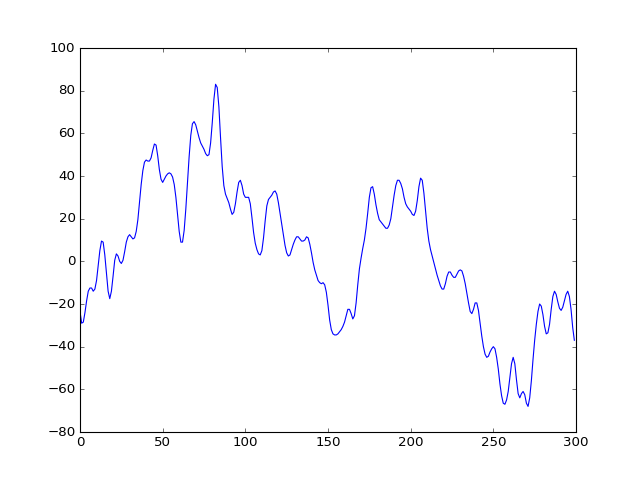

In [30]:
%matplotlib notebook
start=467000
width=300
plt.plot(traces['filtered'][start:start+width]/2)

In [ ]:
filtered=traces['filtered'][1100:]
filteredL=traces['filteredL'][1100:]

In [ ]:
filtered[:10]

In [ ]:
filteredL[:10]/4

In [ ]:
minmax_dt=np.dtype([('filtered','i4'),('low','i4'),('high','i4'),('clk','i4')])
minmax=Data.fromfile('minmax',minmax_dt,'teslib','measurement_subsystem_TB',tool='vivado')
fxing_dt=np.dtype([('extrema','i4'),('area','i4'),('clk','i4')])
fxing=Data.fromfile('filteredxing',fxing_dt,'teslib','measurement_subsystem_TB',tool='vivado')

In [ ]:
minmax

In [ ]:
fxing

In [ ]:
np.where(fxing['area']==0)

In [ ]:
np.where(fxing['extrema']==0)

In [ ]:
fxing[30]

In [ ]:
exn=np.where(fxing['extrema']<0)
clkn=np.where(fxing['clk']>0)

In [ ]:
fxing[374]

In [ ]:
clkn

In [ ]:
np.where(minmax[maxs[0]-1]['min']!=1)

In [ ]:
minmax[maxs[0]-1][65]

In [ ]:
2290-925

In [ ]:
0.375*4

In [ ]:
np.where(minmax['clock']==2290)

In [ ]:
minmax[120:140]

In [ ]:
stream_dt=np.dtype([('data','>i4'),('last','i4')])
#stream=np.fromfile('data/stream',stream_dt)

### bytestream stuff

In [24]:
stream_dt=np.dtype([('data','i4'),('last','i4')])
stream=Data.fromfile('bytestream',stream_dt,'teslib','measurement_subsystem_TB',tool='vivado')
lasts=np.where(stream['last']<=0)[0]+1
#data=np.copy(stream['data'])

In [14]:
stream

array([(90, 69), (1, 71), (2, 73), ..., (0, 349943), (0, 349945),
       (0, 349947)], 
      dtype=[('data', '<i4'), ('last', '<i4')])

In [17]:
stream=np.fromfile('data/bytestream',stream_dt)

In [25]:
bs=PacketStream(stream)

In [26]:
bs.packets

[ethertype:88B5 length:48 Payload:tick frame:0 protocol:0,
 ethertype:88B5 length:32 Payload:peak frame:1 protocol:1,
 ethertype:88B5 length:56 Payload:pulse frame:2 protocol:2,
 ethertype:88B5 length:48 Payload:tick frame:3 protocol:3,
 ethertype:88B5 length:32 Payload:peak frame:4 protocol:4,
 ethertype:88B5 length:56 Payload:pulse frame:5 protocol:5,
 ethertype:88B5 length:32 Payload:peak frame:6 protocol:6,
 ethertype:88B5 length:56 Payload:pulse frame:7 protocol:7,
 ethertype:88B6 length:1496 Payload:mca frame:8 protocol:0,
 ethertype:88B5 length:48 Payload:tick frame:9 protocol:8,
 ethertype:88B6 length:1496 Payload:mca frame:10 protocol:1,
 ethertype:88B6 length:1496 Payload:mca frame:11 protocol:2,
 ethertype:88B6 length:1496 Payload:mca frame:12 protocol:3,
 ethertype:88B6 length:1496 Payload:mca frame:13 protocol:4,
 ethertype:88B6 length:1496 Payload:mca frame:14 protocol:5,
 ethertype:88B6 length:1496 Payload:mca frame:15 protocol:6,
 ethertype:88B6 length:1496 Payload:mca 

In [12]:
bs.packets[2]

ethertype:88B5 length:56 Payload:pulse frame:2 protocol:2

In [ ]:
eheader_dt=[('etype','<u2'),('length','u2'),()]

In [ ]:
'{:X}'.format(bs.packets[1].bytes[23])


In [ ]:
'{:X}'.format(bs.packets[0].bytes[28:30].view(np.uint16)[0])

In [13]:
pulse_peak_dt=np.dtype([('height','i2'),('rise','i2'),('minima','u2'),('time','i2')])
pulse_dt=np.dtype([('size','i2'),('resv','i2'),('flags','i2'),('time','u2'),
                  ('area','i4'),('length','i2'),('offset','i2'),('peaks',(pulse_peak_dt,2))])

In [14]:
pulses=bs.packets[2].payload.view(pulse_dt)

In [15]:
pulses['peaks']

array([[(1329, 41, 65485, 40), (0, 0, 0, 0)]], 
      dtype=[('height', '<i2'), ('rise', '<i2'), ('minima', '<u2'), ('time', '<i2')])

In [9]:
pulses['offset']

array([30], dtype=int16)

In [10]:
pulses['length']

array([648], dtype=int16)

In [ ]:
class eflags:
    def __init__(self,uint16):
        self.new_window=np.bitwise_and(uint16,0x00000001)!=0
        self.tick=np.bitwise_and(uint16,0x00000002)!=0
        self.type=np.right_shift(np.bitwise_and(uint16,0x0000000c),2)
        
    def __repr__(self):
        return 'New window:{:}\n'.format(self.new_window) + \
               'Tick:{:}\n'.format(self.tick) + \
               'Type:{:}\n'.format(self.type) 

In [ ]:
f=eflags(pulses[0]['flags'])
f

In [ ]:
'{:X}'.format(bs.packets[3].bytes[13:14].view(np.uint16))

In [ ]:
'{:X}'.format(bs.packets[3].bytes[14:16].view(np.uint16)[0])

In [ ]:
bs.packets[3].bytes[14:16].view(np.uint16)[0]

In [ ]:
bs=np.uint8(stream['data'][:48])

In [ ]:
bs

In [ ]:
events=stream['data'].view(event_dt)

In [ ]:
'{:X}'.format(events['flags'][0])

In [ ]:
events['rise']

In [ ]:
events

In [ ]:
'{:04X}'.format(events['flags'][1])

In [ ]:
pulse_peak_dt=np.dtype([('time','>i2'),('minima','>i2'),('rise','>u2'),('height','>i2')])
pulse_dt=np.dtype([('time','>i2'),('flags','>i2'),('resv','>i2'),('size','>u2'),
                  ('offset','>i2'),('length','>i2'),('area','>i4'),('peaks',(pulse_peak_dt,1))])
data=np.copy(stream['data'])

In [ ]:
pulses=data.view(pulse_dt)

In [ ]:
pulses['peaks']['height']-pulses['peaks']['minima']

In [ ]:
pulses['peaks']['minima']

In [ ]:
peak_count=np.right_shift(np.bitwise_and(pulses['flags'],0xF000),12)
peak_overflow=np.bitwise_and(pulses['flags'],0x0800)!=0
channel=np.right_shift(np.bitwise_and(pulses['flags'],0x0700),8)
timing_type=np.right_shift(np.bitwise_and(pulses['flags'],0x00C0),6)
height_type=np.right_shift(np.bitwise_and(pulses['flags'],0x0030),4)
event_type=np.right_shift(np.bitwise_and(pulses['flags'],0x000E),1)
new_window=np.bitwise_and(pulses['flags'],0x0001)!=0

In [ ]:
peak_overflow

In [ ]:
test_dt=np.dtype(
    [('time','i2'),('flags','i2'),('rise','u2'),('minima','i2'),('low','u8'),('high','u8')]
)
test=data.view(test_dt)

In [ ]:
test

In [ ]:
test['minima']

In [ ]:
low1=np.int32(np.right_shift(np.bitwise_and(test['low'],0x03FFFF000000000),36))
s=(np.bitwise_and(low1,0x00020000)!=0)*0xFFFC0000
low2=np.int32(np.right_shift(np.bitwise_and(test['low'],0x000000FFFFC0000),18))
low_threshold=np.int32(np.bitwise_and(test['low'],0x00000000003FFFF))
high1=np.int32(np.right_shift(np.bitwise_and(test['high'],0x03FFFF000000000),36))
high2=np.int32(np.right_shift(np.bitwise_and(test['high'],0x000000FFFFC0000),18))
high_threshold=np.int32(np.bitwise_and(test['high'],0x00000000003FFFF))

In [ ]:
np.int32(np.bitwise_or(low1,s))/8.0

In [ ]:
'{:04X}'.format(low1[0])

In [ ]:
high1/8.0

In [ ]:
high2/8.0

In [ ]:
'{:04X}'.format(high_threshold[0])